In [1]:
import numpy as np
import matplotlib.pylab as plt

In [20]:
nSteps = 100
nPart = 100
vsx = np.reshape( np.random.randn(nSteps*nPart), [nSteps,nPart])
vsy = np.reshape( np.random.randn(nSteps*nPart), [nSteps,nPart])

dt = 1.

vxdt = vsx*dt
vydt = vsy*dt


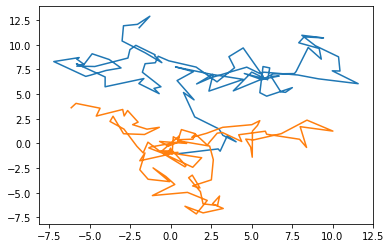

In [21]:

trajx = np.cumsum(vxdt,axis=0)
trajy = np.cumsum(vydt,axis=0)
s0 = np.zeros(nPart)
trajx+=s0[0]
trajy+=s0[1]

plt.plot(trajx[:,0],trajy[:,0])
plt.plot(trajx[:,1],trajy[:,1])

In [22]:

stackx = np.reshape(trajx,nSteps * nPart)
stacky = np.reshape(trajy,nSteps * nPart)

out = np.histogram2d(stackx,stacky)


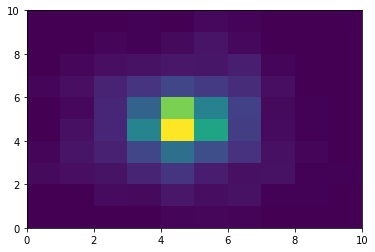

In [23]:
a,b,c = out
np.shape(c)

#plt.pcolormesh(a,b,c)
plt.pcolormesh(a)

In [75]:
s0 = np.array( [0,0,1,1,0] )
s1 = np.array([1,0.4,0,0.6,0]   )    

In [76]:
xBoundary = 0.5 # do fwd and back

def cross(s0,s1,right=True):
    if right:
        diffr = s1 - xBoundary
        diffl = s0 - xBoundary  
    else:
        diffr = xBoundary - s1 
        diffl = xBoundary - s0 
    deltaWallFin = np.array((diffr) > 0,dtype=int)

    
    deltaWallStart =  -1 * np.array((diffl)< 0 ,dtype=int)
    prod = deltaWallFin*deltaWallStart
          
        
    print( deltaWallFin, deltaWallStart )
    print( prod)
    idx = np.argwhere( prod < 0 )
    totCross = np.shape( idx )[0]
    jdx = np.argwhere( deltaWallStart[idx] < 0 ) 
    rCross = np.shape( jdx )[0]
    print(totCross)
    print(rCross)     
    return rCross

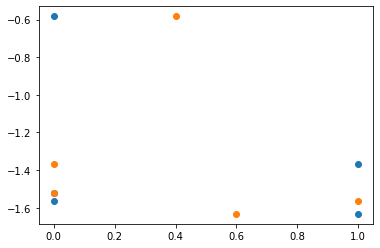

In [78]:
y = np.random.randn( nPart ) 
plt.scatter(s0,y)
plt.scatter(s1,y)

In [71]:
rcross = cross(s0,s1,right=True)  # right 
lcross = cross(s0,s1,right=False)  
print(rcross,lcross,rcross+lcross)


[1 0 0 1] [-1 -1  0  0]
[-1  0  0  0]
1
1
[0 1 1 0] [ 0  0 -1 -1]
[ 0  0 -1  0]
1
1
1 1 2


[1 1 0 0 1] [0 0 0 0 0]
[0 0 0 0 0]
0
0


In [30]:
print(s1)

[ 0.62836933  0.67309317 -0.69278428 -1.33584769  1.0536666 ]
